In [5]:
import tensorflow as tf
import keras
from keras.datasets import imdb
# keras 에 내장된 datasets 에서 imdb 라는 영화 리뷰 분류 dataset을 import 함
# keras 버전 확인
keras.__version__

'2.7.0'

In [6]:
# keras 에서 import 한 imdb dataset을 train, test로 로드
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000 매개 변수 = train 데이터에서 가장 자주 나타나는 단어 1만개만 사용하도록 설정

In [7]:
train_data[0] 
train_labels[0] # 부정:0 긍정:1 로 나타내는 리스트

1

In [8]:
max([max(sequence) for sequence in train_data])
# 가장 자주 나타나는 단어를 1만개로 설정했기 때문에 9,999개를 넘지 않음

9999

In [9]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 dict
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()] # 정수 인덱스와 단어를 매핑하도록 뒤집음
    )
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3,'?') for i in train_data[0]] # 리뷰를 디코딩
    )         # 0, 1, 2 는 "패딩", "문서 시작", "사전에 없음"을 위한 인덱스이므로 3을 뺌

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
import numpy as np

def vectorize_sequences(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))   
  # 행렬의 크기가 (len(sequence), dimension)이고 모든 원소를 0으로 만듬
  for i, sequence in enumerate(sequence):
    results[i, sequence] =1. # results[i]에서 특정 인덱스의 위치를 1로 만듬
  return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

# 데스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

In [12]:
# sample 확인
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# label(실측값) 을 벡터로 바꿈
# y_train, y_test 변수를 생성하여 train 데이터의 실측값과 test 데이터의 실측값을 넣어줌

In [ ]:
# output = relu(dot(W,input)+b)

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 변환의 집합

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# 긍정과 부정으로 이진 분류하는 문제고, 신경망의 출력이 확률이기 때문에 sigmoid 활성화 함수를 출력층에 사용

# output = relu(dot(W,input)+b)
# 이러한 가설 공간은 제약이 매우 많음
# 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 대문에 층을 여러 개로 구성하는 장점 X
# 층을 추가해도 가설 공간이 확정되지 않음

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 손실 함수(loss)='binary_crossentropy'와 옵티마이저(optimizer)='rmsprop' 선택
# 'mean_squared_error'도 사용 할 수 있음
# 후련하는 동안 정확도(accuracy)를 사용하여 모니터링

In [ ]:
# 옵티마이저 설정

# from keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# 손실과 측정을 함수 객체로 지정

# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

In [16]:
# 훈련 검증
# 훈련하는 동안 처음 본 데이터의 대한 모델의 정확도를 측정하기 위해서
# 원본 훈련 데이터에서 1만개의 샘플을 떼어 검증 세트를 생성

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train [10000:]

In [17]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

# model을 512개의 샘플씩 미니 배치를 만들어 20번의 epochs 동안 훈련
# 동시에 따로 떼어 둔 1만 개의 샘플에서 손실과 정확도를 측정
# validation_data 매개변수에 검증 데이터를 전달

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5197 - accuracy: 0.8072 - val_loss: 0.4331 - val_accuracy: 0.8312
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3237 - accuracy: 0.9008 - val_loss: 0.3165 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2395 - accuracy: 0.9244 - val_loss: 0.2889 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1896 - accuracy: 0.9389 - val_loss: 0.2754 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1547 - accuracy: 0.9502 - val_loss: 0.2943 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1294 - accuracy: 0.9593 - val_loss: 0.2895 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1057 - accuracy: 0.9682 - val_loss: 0.3097 - val_accuracy: 0.8835
Epoch 8/20
30

In [18]:
# model.fit() 메서드는 history 객체를 반환
# 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 dict history 속성을 가짐

# 확인
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

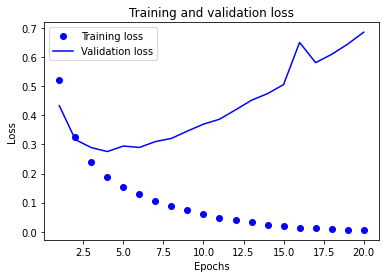

In [19]:
# 손실 값으로 그래프 만들기

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

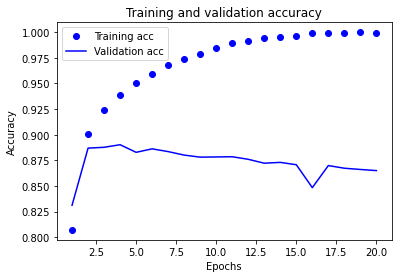

In [20]:
# 정확도 값으로 그래프 만들기

plt.clf() 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4608 - accuracy: 0.8178
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2636 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2018 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3334 - accuracy: 0.8667


In [24]:
results

[0.3333655893802643, 0.8667200207710266]

In [25]:
model.predict(x_test)

array([[0.12068078],
       [0.9997902 ],
       [0.39742547],
       ...,
       [0.07001644],
       [0.04270214],
       [0.4506589 ]], dtype=float32)

### 추가 실험

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 47ms/step - loss: 0.1397 - accuracy: 0.8074
Epoch 2/4
49/49 [==============================] - 2s 45ms/step - loss: 0.0716 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 2s 46ms/step - loss: 0.0520 - accuracy: 0.9341
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.1020 - accuracy: 0.8658


In [27]:
results

[0.10197912156581879, 0.8658000230789185]

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.1423 - accuracy: 0.8295
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0801 - accuracy: 0.9125
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0623 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0852 - accuracy: 0.8870


In [29]:
results

[0.0852297842502594, 0.8870000243186951]

In [30]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 35ms/step - loss: 0.1341 - accuracy: 0.8247
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.0683 - accuracy: 0.9132
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.0509 - accuracy: 0.9343
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.1023 - accuracy: 0.8678


In [31]:
results

[0.10225161164999008, 0.8677999973297119]